Train RMSE (scaled features): 0.11
Test RMSE (scaled features): 0.12


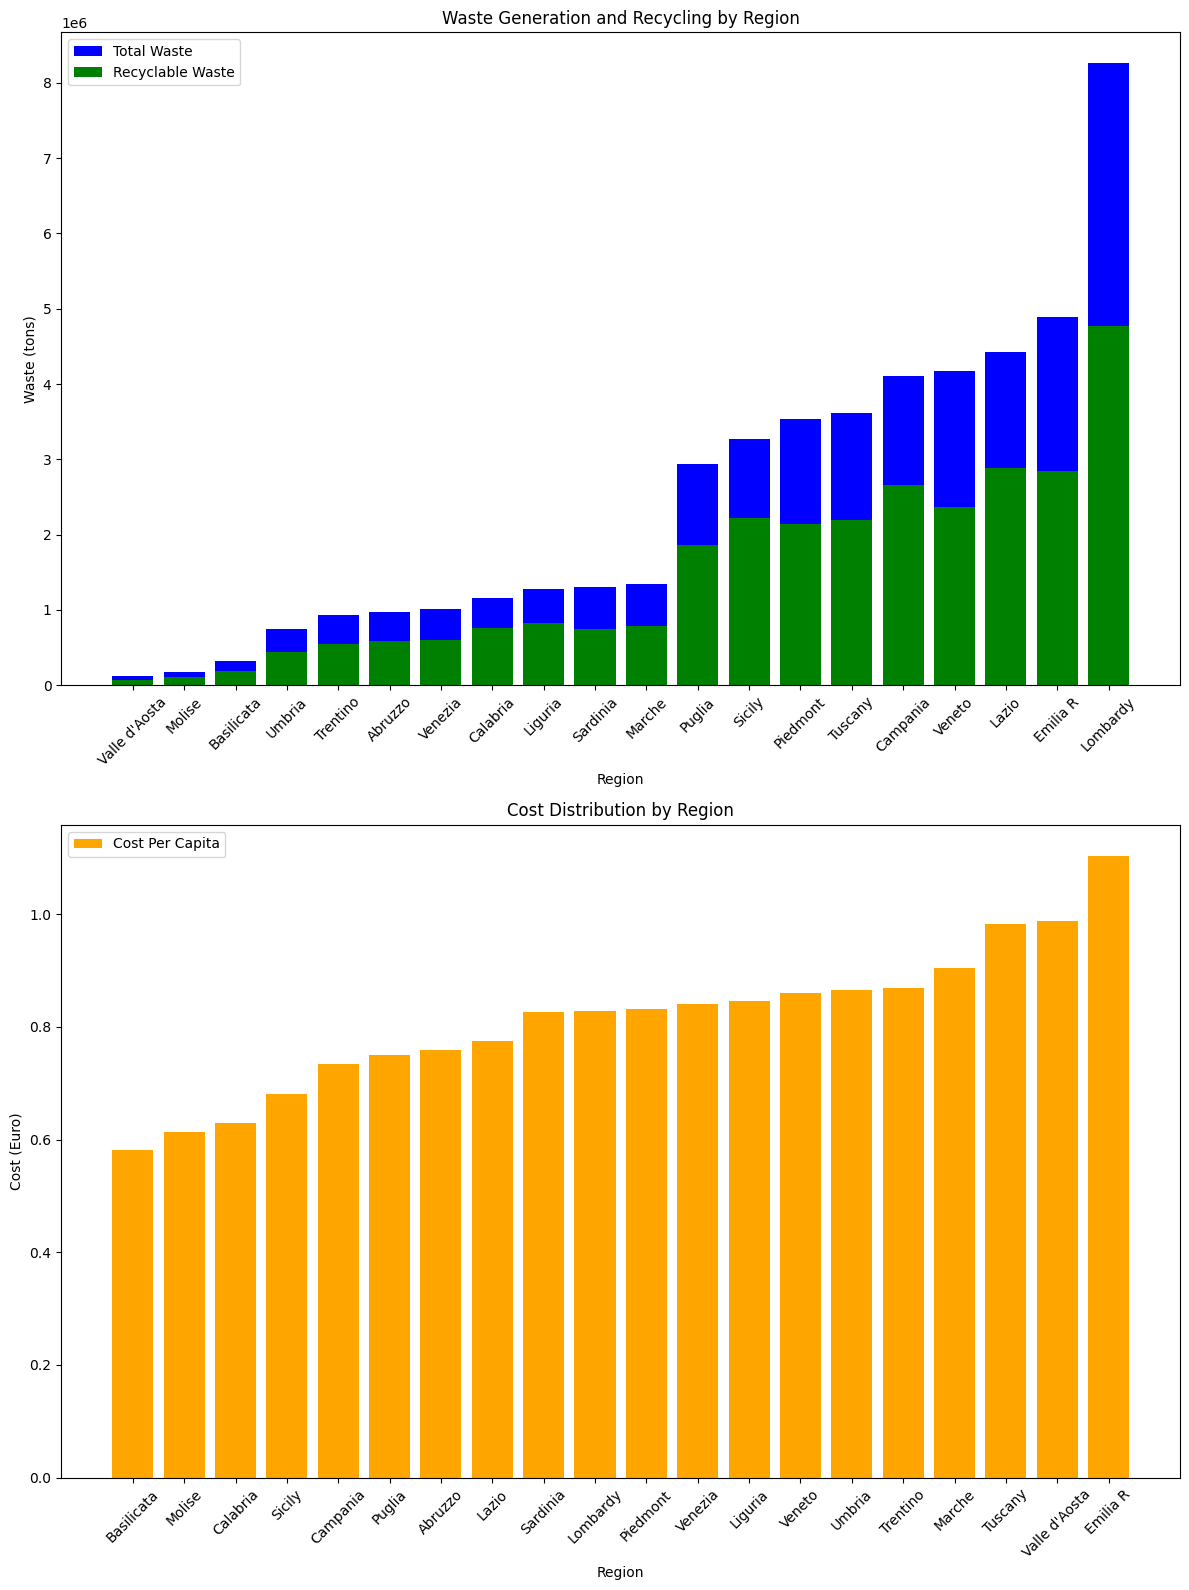

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Data
data = {
    'Region': ['Piedmont', 'Valle d\'Aosta', 'Lombardy', 'Trentino', 'Veneto',
               'Venezia', 'Liguria', 'Emilia R', 'Tuscany', 'Umbria',
               'Marche', 'Lazio', 'Abruzzo', 'Molise', 'Campania', 'Puglia', 'Basilicata',
               'Calabria', 'Sicily', 'Sardinia'],
    'ISTAT': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'Population': [4252279, 123337, 9965046, 1077932, 4854633, 1197295, 1507438, 4431816, 3676285, 859572,
                   1489789, 5715190, 1273660, 290769, 5590681, 3912166, 539999, 1844586, 4801468, 1579181],
    'RD(t)': [1404419.327, 47550.623, 3484717.559, 393951.388, 1804268.05, 407555.803, 453907.002, 2050694.811, 1410412.133, 298097.008,
              562713.889, 1540431.919, 379502.813, 65971.067, 1449468.05, 1066312.672, 121229.013, 402412.842, 1044148.298, 559254.374],
    'RU(t)': [2134952.77, 74241.603, 4774012.38, 542791.978, 2368469.638, 599861.893, 822293.307, 2839418.25, 2199463.893, 445321.447,
              785640.356, 2883852.17, 587164.591, 112195.248, 2652820.469, 1864834.849, 193214.244, 758515.649, 2224866.5, 746912.386],
    'RD(%)': [65.78, 64.05, 72.99, 72.58, 76.18, 67.94, 55.20, 72.22, 64.13, 66.94,
              71.62, 53.42, 64.63, 58.80, 54.64, 57.18, 62.74, 53.05, 46.93, 74.88],
    'RD per capita (kg/inhabitant year)': [330.27, 385.53, 349.69, 365.47, 371.66, 340.40, 301.11, 462.72, 383.65, 346.80,
                                           377.71, 269.53, 297.96, 226.88, 259.27, 272.56, 224.50, 218.16, 217.46, 354.14],
    'RU per capita (kg/inhabitant year)': [502.07, 601.94, 479.08, 503.55, 487.88, 501.01, 545.49, 640.69, 598.28, 518.07,
                                           527.35, 504.59, 461.01, 385.86, 474.51, 476.68, 357.80, 411.21, 463.37, 472.97]
}

df_combined = pd.DataFrame(data)

# MSW Generation Analysis
total_waste = df_combined["RD(t)"] + df_combined["RU(t)"]
df_combined["Total Waste(t)"] = total_waste

# Recycling Analysis
df_combined["Recycling Rate (%)"] = (df_combined["RU(t)"] / total_waste) * 100

# Per Capita Analysis
df_combined["Total Pro Capita (kg/ab.*anno)"] = df_combined["RD per capita (kg/inhabitant year)"] + df_combined["RU per capita (kg/inhabitant year)"]

# Update the line defining target_combined
target_combined = df_combined['Total Waste(t)']

# Model Selection - Linear Regression Example
features_combined = df_combined[['Population', 'RD(%)', 'RU per capita (kg/inhabitant year)']].copy()
features_combined['RD(%)'] = pd.to_numeric(features_combined['RD(%)'])

# Feature Scaling
scaler_combined = StandardScaler()
X_train_scaled_combined = scaler_combined.fit_transform(features_combined)
target_scaled_combined = scaler_combined.fit_transform(target_combined.values.reshape(-1, 1)).flatten()

X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_train_scaled_combined, target_scaled_combined, test_size=0.2, random_state=42)

model_combined = LinearRegression()
model_combined.fit(X_train_combined, y_train_combined)

# Predictions
y_pred_train_combined = model_combined.predict(X_train_combined)
y_pred_test_combined = model_combined.predict(X_test_combined)

# Model Evaluation
train_rmse_combined = mean_squared_error(y_train_combined, y_pred_train_combined, squared=False)
test_rmse_combined = mean_squared_error(y_test_combined, y_pred_test_combined, squared=False)

print(f"Train RMSE (scaled features): {train_rmse_combined:.2f}")
print(f"Test RMSE (scaled features): {test_rmse_combined:.2f}")

# Cost Distribution (Simplified Example)
df_combined['Cost Per Capita'] = df_combined['Total Waste(t)'] / df_combined['Population']

# Visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 16))

# Plot 1: Waste Generation and Recycling by Region
df_combined['Region'] = df_combined['Region'].str.strip()  # Remove leading and trailing whitespaces
df_combined = df_combined.sort_values("Total Waste(t)")
ax1.bar(df_combined["Region"], df_combined["Total Waste(t)"], color='blue', label='Total Waste')
ax1.bar(df_combined["Region"], df_combined["RU(t)"], color='green', label='Recyclable Waste')
ax1.set_xlabel('Region')
ax1.set_ylabel('Waste (tons)')
ax1.set_title('Waste Generation and Recycling by Region')
ax1.legend()
ax1.tick_params(axis='x', rotation=45, labelrotation=45)

# Plot 2: Cost Distribution by Region
df_combined = df_combined.sort_values("Cost Per Capita")
ax2.bar(df_combined["Region"], df_combined["Cost Per Capita"], color='orange', label='Cost Per Capita')
ax2.set_xlabel('Region')
ax2.set_ylabel('Cost (Euro)')
ax2.set_title('Cost Distribution by Region')
ax2.legend()
ax2.tick_params(axis='x', rotation=45, labelrotation=45)

plt.tight_layout()
plt.show()
